## Importing Necessary Libraries:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

import warnings
warnings.filterwarnings('ignore')

## Data Collection:

In [23]:
bank_data=pd.read_csv('bank-full.csv')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Understanding:

In [24]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [25]:
bank_data=pd.get_dummies(bank_data,columns=['job','marital','education','contact','poutcome'],drop_first=True)
bank_data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,1,0,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,0,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,1,0,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,1,0,0,1,0,0,0,1


In [26]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [27]:
# Custom Binary Encoding of Binary o/p variables 

bank_data['default']= np.where(bank_data['default'].str.contains('yes'),1,0)
bank_data['housing']= np.where(bank_data['housing'].str.contains('yes'),1,0)
bank_data['loan']= np.where(bank_data['loan'].str.contains('yes'),1,0)
bank_data['y']= np.where(bank_data['y'].str.contains('yes'),1,0)
bank_data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,...,1,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,...,1,0,1,0,0,1,0,0,0,1


In [28]:
# Find and Replace Encoding for month categorical varaible

bank_data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [29]:
bank_data['month']=bank_data['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,
                                           'nov':11,'dec':12})

In [30]:
bank_data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,1,0,1,0,0,1,0,0,0,1


In [31]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int32
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

### Now, all the features are numerical.

## Model Building:

In [32]:
X = pd.concat([bank_data.iloc[:,:11],bank_data.iloc[:,12:]],axis=1)
y = pd.concat([bank_data.iloc[:,11]])

## Model Training:

In [33]:
logistic_model = LogisticRegression()
logistic_model.fit(X,y)

LogisticRegression()

In [34]:
logistic_model.coef_

array([[-2.99127191e-02, -1.12193800e-02,  2.49206912e-05,
        -4.58863944e-01, -1.20752043e-01, -2.03013088e-02,
         1.04399327e-02,  3.54250622e-03, -4.44870915e-01,
        -6.10380311e-04,  1.75186247e-01, -1.77266467e-01,
        -1.63070460e-02, -4.17071521e-03,  1.99175696e-02,
         1.04419942e-01, -7.69126457e-03, -6.03010367e-02,
         2.25131381e-02, -4.02156909e-02,  1.08683658e-03,
         1.84285323e-03, -1.12754815e-01, -7.10732421e-02,
        -1.84467400e-01,  5.24494428e-02,  8.93280182e-03,
         3.12976477e-02, -3.00912372e-01, -1.53732753e-02,
         2.07652858e-01, -2.85741647e-01]])

In [35]:
logistic_model.intercept_

array([-0.17378147])

## Model Testing || Model Evaluation:

In [36]:
y_pred = logistic_model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [37]:
accuracy_score(y,y_pred)

0.8888544823162504

In [38]:
bank_confusion_matrix=confusion_matrix(y,y_pred)
bank_confusion_matrix

array([[39142,   780],
       [ 4245,  1044]], dtype=int64)

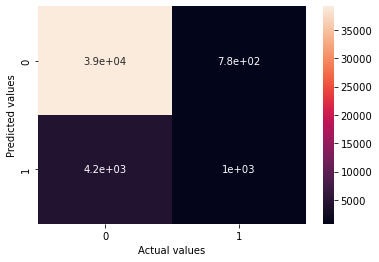

In [39]:
sns.heatmap(bank_confusion_matrix,annot =True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [42]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



In [43]:
# As accuracy = 0.88, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
logistic_model.predict_proba(X)[:,1]

array([0.07514668, 0.05791377, 0.05391174, ..., 0.4454161 , 0.05728878,
       0.60723441])

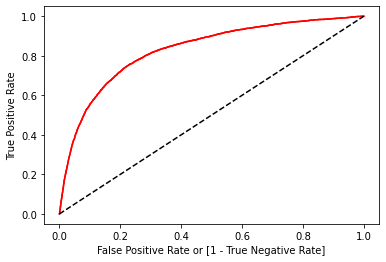

auc accuracy: 0.5889263559118953


In [44]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,logistic_model.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)
plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()
print('auc accuracy:',auc)
